In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from astropy.io import fits
from astropy.visualization import make_lupton_rgb

Now we are ready to load some FITS file.We will open the M13 FITS file. To load one of these in to Python we use the open function, and pass the location of the file we want as the first argument.

In [2]:
M42 = fits.open('frame-u-006073-4-0063.fits')

In [3]:
M42.info()

Filename: frame-u-006073-4-0063.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      96   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


The image information is located in the PRIMARY block. We can see that it's made up of two HDU (Header Data Unit) objects. A HDU is a high level FITS file component, typically containing data and an associated header.

We can add info about our instument, parameters like luminosity etc

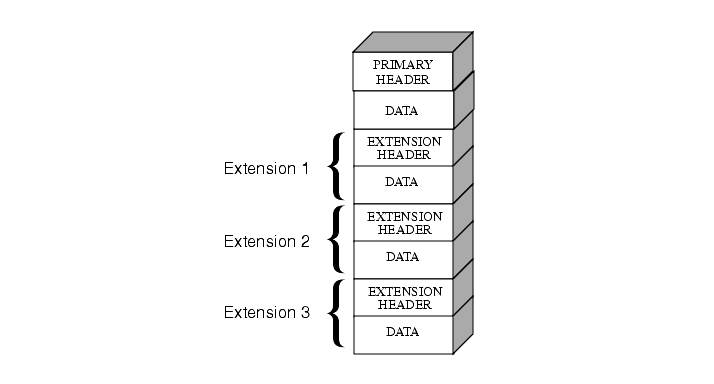

To get fits file, we can access https://dr12.sdss.org/

In [4]:
M42.info()

Filename: frame-u-006073-4-0063.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      96   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


In [5]:
M42[0].header # Open PrimaryHDU
# M42[1].header # Open PrimaryHDU
# M42[2].header # Open PrimaryHDU
# M42[3].header # Open PrimaryHDU

SIMPLE  =                    T /                                                
BITPIX  =                  -32 / 32 bit floating point                          
NAXIS   =                    2                                                  
NAXIS1  =                 2048                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T /Extensions may be present                       
BZERO   =              0.00000 /Set by MRD_SCALE                                
BSCALE  =              1.00000 /Set by MRD_SCALE                                
TAI     =        4649973257.37 / 1st row Number of seconds since Nov 17 1858    
RA      =            83.820000 / 1st row RA of telescope boresight (deg)        
DEC     =           -5.349071  / 1st row Dec of telescope boresight (degrees)   
SPA     =             180.000  / 1st row Cam col position angle wrt N (deg)     
IPA     =             137.18

In [6]:
data = M42[0].data

In [7]:
type[data]

type[array([[ 2.4609375e-01,  1.9140625e-01,  9.5703125e-01, ...,
         2.1923828e-01,  1.2008667e-02,  6.7260742e-02],
       [ 1.0937500e-01,  1.9140625e-01,  1.0390625e+00, ...,
         1.1993408e-02,  6.7260742e-02,  1.3623047e-01],
       [ 1.0937500e-01,  2.1875000e-01,  1.1074219e+00, ...,
        -4.3273926e-02, -2.9449463e-02,  1.1978149e-02],
       ...,
       [ 1.8750000e-01,  2.1508789e-01,  9.2375000e+01, ...,
         2.4291992e-01,  1.6015625e-01,  2.2900391e-01],
       [ 2.4218750e-01,  2.8320312e-01,  8.9750000e+01, ...,
         1.7382812e-01,  2.7050781e-01,  1.6015625e-01],
       [ 1.8750000e-01,  6.4575195e-02,  8.7500000e+01, ...,
         1.4624023e-01,  1.3256836e-01,  1.7382812e-01]], dtype=float32)]

In [8]:
data.shape

(1489, 2048)

In [9]:
data.dtype.name

'float32'

In [10]:
print('Min: ', np.min(data))
print('Max: ', np.max(data))
print('Mean: ', np.mean(data))
print('Stdev: ', np.std(data))

Min:  -0.34472656
Max:  552.0
Mean:  5.3398747
Stdev:  15.16415


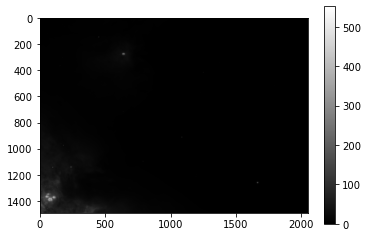

In [11]:
plt.imshow(data, cmap='gray')
plt.colorbar()

Color map available
http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps

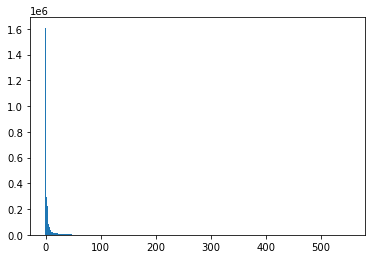

In [12]:
histogram = plt.hist(data.flat, bins=500)

[Text(1, 4000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

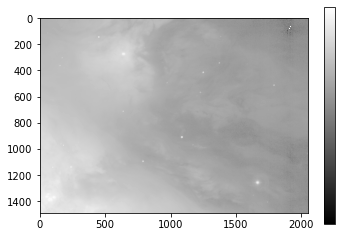

In [13]:
plt.imshow(data, cmap='gray', norm=LogNorm())
cbar = plt.colorbar(ticks=[4.e3, 1.e4, 2.e4])
cbar.ax.set_yticklabels(['5,000', '10,000','20,000'])

In [14]:
M42u = fits.open('frame-u-006073-4-0063.fits')
M42i = fits.open('frame-i-006073-4-0063.fits')
M42g = fits.open('frame-g-006073-4-0063.fits')

In [15]:
g = M42g[0].data
i = M42i[0].data
u = M42u[0].data

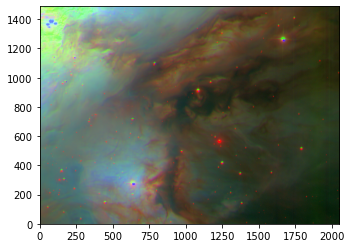

In [34]:
rgb_default = make_lupton_rgb(i, g, u, stretch=1.5, Q=10)

#

plt.imshow(rgb_default, origin='lower')